In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('dfavgscores238.xlsx', index_col= 0)

I want to choose a dataset from the filtered one ( z score etc. ) and then do these correlation thingies for the numeric data. 

## The below is for comparing columns that are non-numeric. 

In [3]:
freq_table = (df['avgscore'].value_counts(normalize = True, bins=10)*100).sort_index()
freq_table

(83.868, 151.789]      0.333615
(151.789, 219.036]     2.199927
(219.036, 286.283]     5.669044
(286.283, 353.53]      9.072888
(353.53, 420.777]     14.009428
(420.777, 488.024]    20.674483
(488.024, 555.271]    24.864015
(555.271, 622.517]    18.479391
(622.517, 689.764]     4.479633
(689.764, 757.011]     0.217575
Name: avgscore, dtype: float64

In [4]:
df['avgscore_binned'] = pd.cut(df['avgscore'], bins=10)

In [5]:
# Create a contingency table
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore_binned'])

In [6]:
contingency_table

avgscore_binned,"(83.869, 151.789]","(151.789, 219.036]","(219.036, 286.283]","(286.283, 353.53]","(353.53, 420.777]","(420.777, 488.024]","(488.024, 555.271]","(555.271, 622.517]","(622.517, 689.764]","(689.764, 757.011]"
ASBH02A,,,,,,,,,,
No,3,55,182,358,540,718,629,331,70,4
Yes,135,855,2163,3395,5255,7834,9656,7313,1783,86


In [10]:
contingency_table.index

Index(['No', 'Yes'], dtype='object', name='ASBH02A')

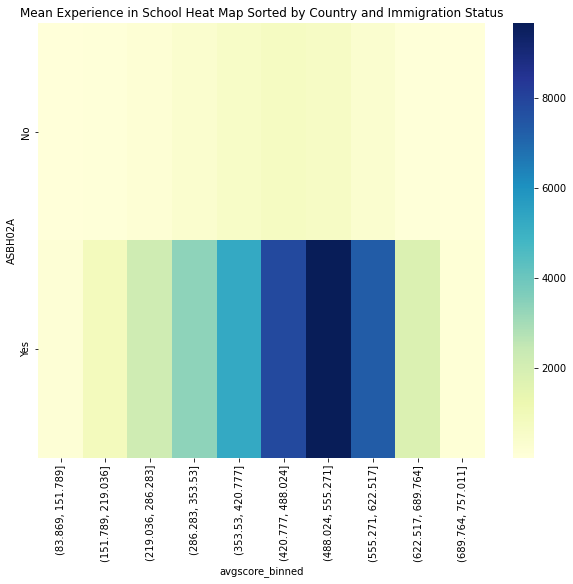

In [7]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=False, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

In [8]:
# Convert the contingency table to a format suitable for Plotly
contingency_table_reset = contingency_table.reset_index()
contingency_table_reset

avgscore_binned,ASBH02A,"(83.869, 151.789]","(151.789, 219.036]","(219.036, 286.283]","(286.283, 353.53]","(353.53, 420.777]","(420.777, 488.024]","(488.024, 555.271]","(555.271, 622.517]","(622.517, 689.764]","(689.764, 757.011]"
0,No,3,55,182,358,540,718,629,331,70,4
1,Yes,135,855,2163,3395,5255,7834,9656,7313,1783,86


In [11]:
contingency_table_reset.index

RangeIndex(start=0, stop=2, step=1)

In [9]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table_reset, annot=False, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

ValueError: could not convert string to float: 'No'

<Figure size 720x576 with 0 Axes>

In [12]:
contingency_table_melted = contingency_table.melt(id_vars='ASBH02A', var_name='avgscore_binned', value_name='count')
contingency_table_melted

KeyError: 'ASBH02A'

In [ ]:
This because as

In [ ]:
# Convert Interval objects to strings
contingency_table_melted['avgscore_binned'] = contingency_table_melted['avgscore_binned'].astype(str)

In [ ]:
import plotly.express as px

In [ ]:
# Plot the heatmap using Plotly
fig = px.density_heatmap(contingency_table_melted, x='ASBH02A', y='avgscore_binned', z='count', color_continuous_scale='agsunset')
fig.update_layout(title='Heatmap of Frequency Counts')
fig.show()

I want to compare this by country

The above is not so useful - I need percentages again - but percentage of what? total nos and total yesses?

Should compare reading scores with the benchmark and can also compare with previous years.
If I get data from different dates maybe I can practice the time/date stuff. change asbh02a to immigrant/ non - immigrant

## Let's see how crosstabbing works with multiple columns

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [ ]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

In [ ]:
df['MINAGEARRIVAL'] = df['MINAGEARRIVAL'].fillna(-1.0)

In [ ]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

In [ ]:
pivot_minage = df.pivot_table(values='avgscore', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [ ]:
pivot_minage

In [ ]:
# Step 2: Calculate the mean score for each country
country_mean_scores = pivot_minage.groupby(level='Country').mean()

# If you want to sum the mean scores across all assessment columns (if there are multiple), you can do:
country_mean_scores['MeanTotal'] = country_mean_scores.mean(axis=1)

# Sort countries by total values
sorted_countries_means = country_mean_scores.sort_values(by='MeanTotal', ascending=False).index

### Create a custom sorter for ASBH02A
## asbh02a_sorter = ['Yes', 'No']

# Get the current index as a DataFrame for sorting
index_df = pivot_minage.index.to_frame()

# Rename the columns to avoid conflict
index_df = index_df.rename(columns={'Country': 'Country_'})

# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_df['Country_'] = pd.Categorical(index_df['Country_'], categories=sorted_countries_means, ordered=True)
##index_df['ASBH02A_'] = pd.Categorical(index_df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_df = index_df.sort_values(by=['Country_'])

# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_minage.loc[index_df.index]

In [ ]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=False, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()